# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

%matplotlib inline 
sns.set(style="ticks")

data = pd.read_csv('./StressLevelDataset.csv', sep=",")

# Основные характеристики датасета

In [2]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
data.shape

(1100, 21)

In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1100


In [5]:
# Список колонок
data.columns
labels_all = {
    'anxiety_level': 'Тревожность',
    'self_esteem': 'Самооценка',
    'mental_health_history': 'Ментальное здоровье',
    'depression': 'Депрессия',
    'headache': 'Головные боли',
    'blood_pressure': 'Кровяное давление',
    'sleep_quality': 'Качество сна',
    'breathing_problem': 'Проблемы с дыханием',
    'noise_level': 'Уровень шума',
    'living_conditions': 'Условия жизни',
    'safety': 'Безопасность',
    'basic_needs': 'Основные нужды',
    'academic_performance': 'Успеваемость',
    'study_load': 'Учебная нагрузка',
    'teacher_student_relationship': 'Отношения учитель-ученик',
    'future_career_concerns': 'Уверенность в будущей работе',
    'social_support': 'Социальная поддержка',
    'peer_pressure': 'Давление сверстников',
    'extracurricular_activities': 'Внеурочные занятия',
    'bullying': 'Травля',
    'stress_level': 'Стресс'
}

In [6]:
# Список колонок с типами данных
data.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

anxiety_level - 0
self_esteem - 0
mental_health_history - 0
depression - 0
headache - 0
blood_pressure - 0
sleep_quality - 0
breathing_problem - 0
noise_level - 0
living_conditions - 0
safety - 0
basic_needs - 0
academic_performance - 0
study_load - 0
teacher_student_relationship - 0
future_career_concerns - 0
social_support - 0
peer_pressure - 0
extracurricular_activities - 0
bullying - 0
stress_level - 0


In [8]:
# Основные статистические характеристки набора данных
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [9]:
# Определим уникальные значения для целевого признака
data['stress_level'].unique()

array([1, 2, 0], dtype=int64)

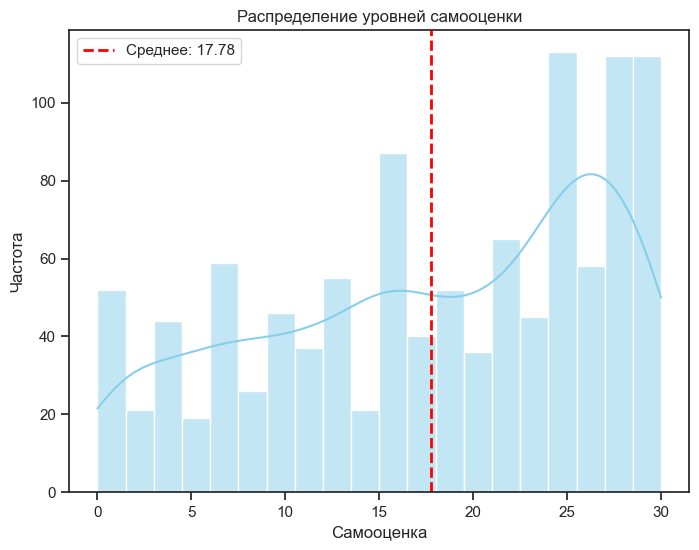

In [10]:
df = data
plt.figure(figsize=(8, 6))

sns.histplot(df['self_esteem'], bins=20, kde=True, color='skyblue')

plt.axvline(df['self_esteem'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {df["self_esteem"].mean():.2f}')

plt.title('Распределение уровней самооценки')
plt.xlabel('Самооценка')
plt.ylabel('Частота')
plt.legend()

plt.show()

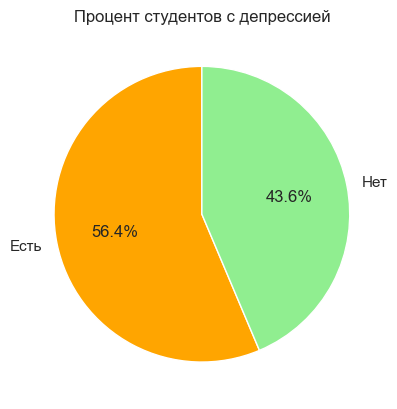

In [11]:
plt.figure()
plt.pie([(df['depression'] > 10).mean() * 100, (1 - (df['depression'] > 10).mean()) * 100],
        labels=['Есть', 'Нет'],
        colors=['orange', 'lightgreen'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Процент студентов с депрессией')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12732\3254907881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sleep_quality', data=df, palette='dark')


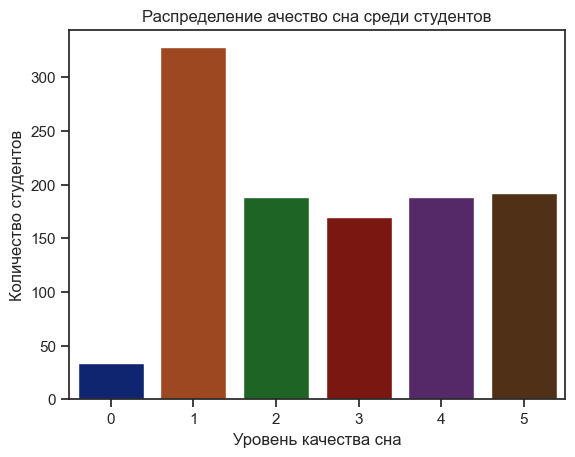

In [12]:
plt.figure()
sns.countplot(x='sleep_quality', data=df, palette='dark')
plt.title('Распределение ачество сна среди студентов')
plt.ylabel('Количество студентов')
plt.xlabel('Уровень качества сна')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12732\2908260495.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['stress_level'], ax=ax[1])


Text(0.5, 0, 'Уровень стресса')

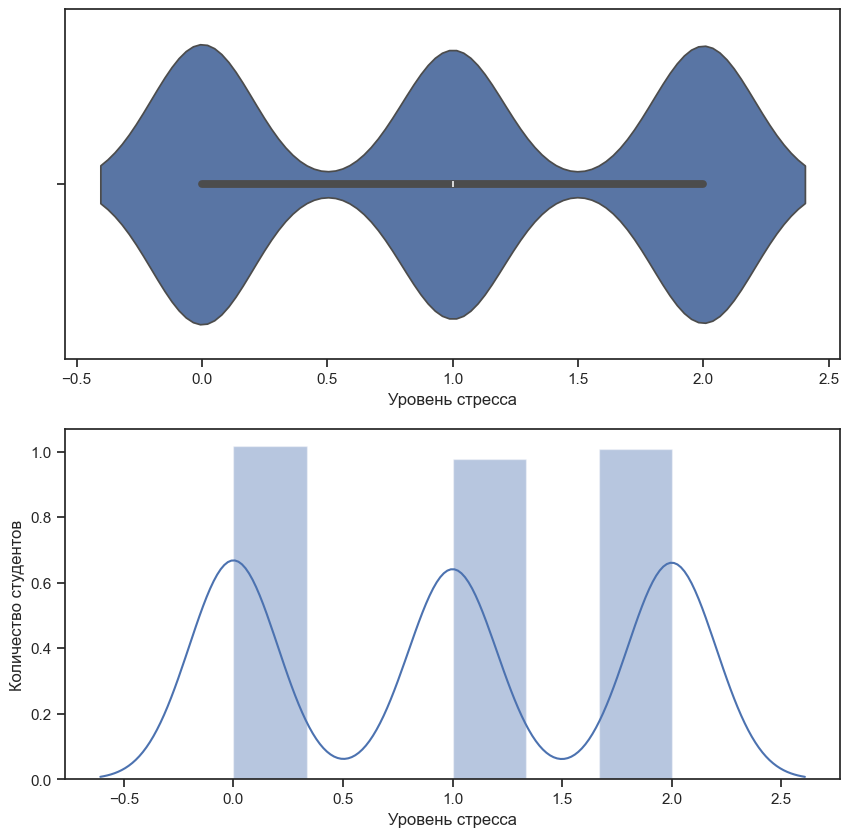

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
plt.ylabel('Количество студентов')
sns.violinplot(ax=ax[0], x=data['stress_level'])
sns.distplot(data['stress_level'], ax=ax[1])
ax[0].set_xlabel('Уровень стресса')
plt.xlabel('Уровень стресса')


<Axes: xlabel='Уровень беспокойства', ylabel='Уровень стресса'>

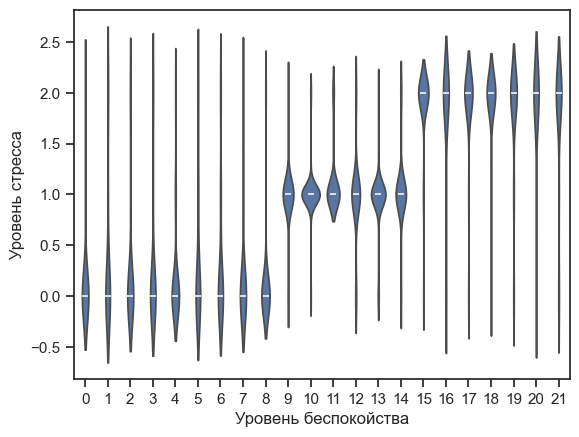

In [14]:
# Распределение параметра Anxiety сгруппированные по Stress.
plt.ylabel('Уровень стресса')
plt.xlabel('Уровень беспокойства')
sns.violinplot(x='anxiety_level', y='stress_level', data=data)

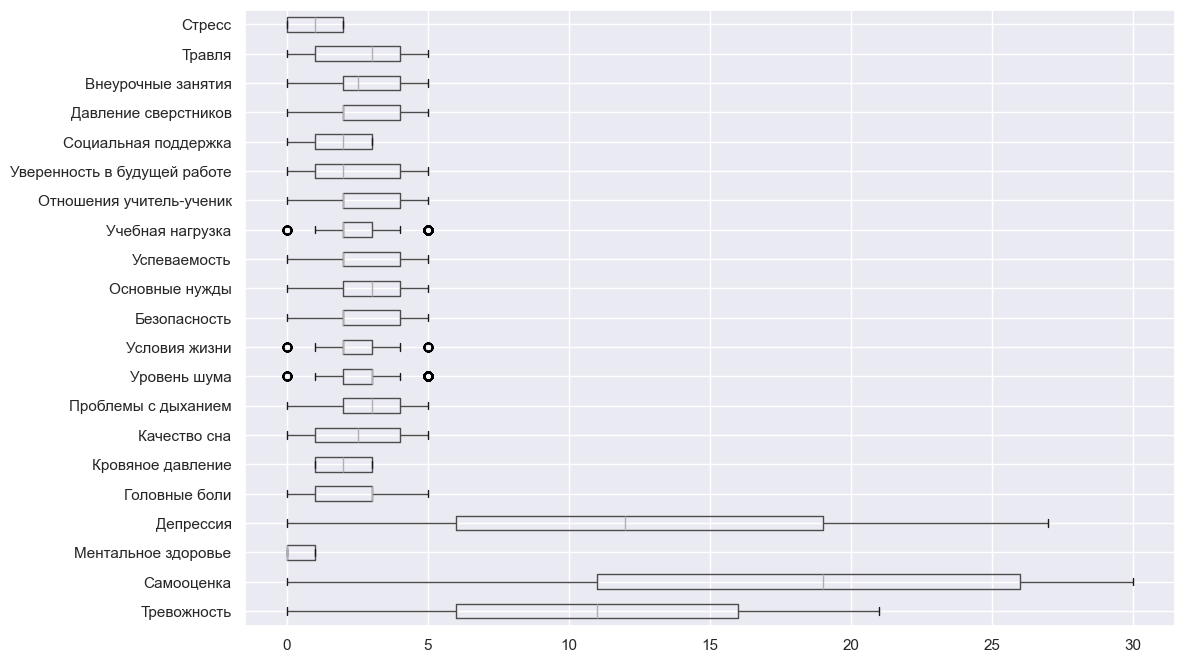

In [15]:
sns.set(font_scale=1.0)

ax = data.boxplot(figsize=(12, 8), vert=False)
ax.set_yticklabels([labels_all[label.get_text()] for label in ax.get_yticklabels()])
plt.show()

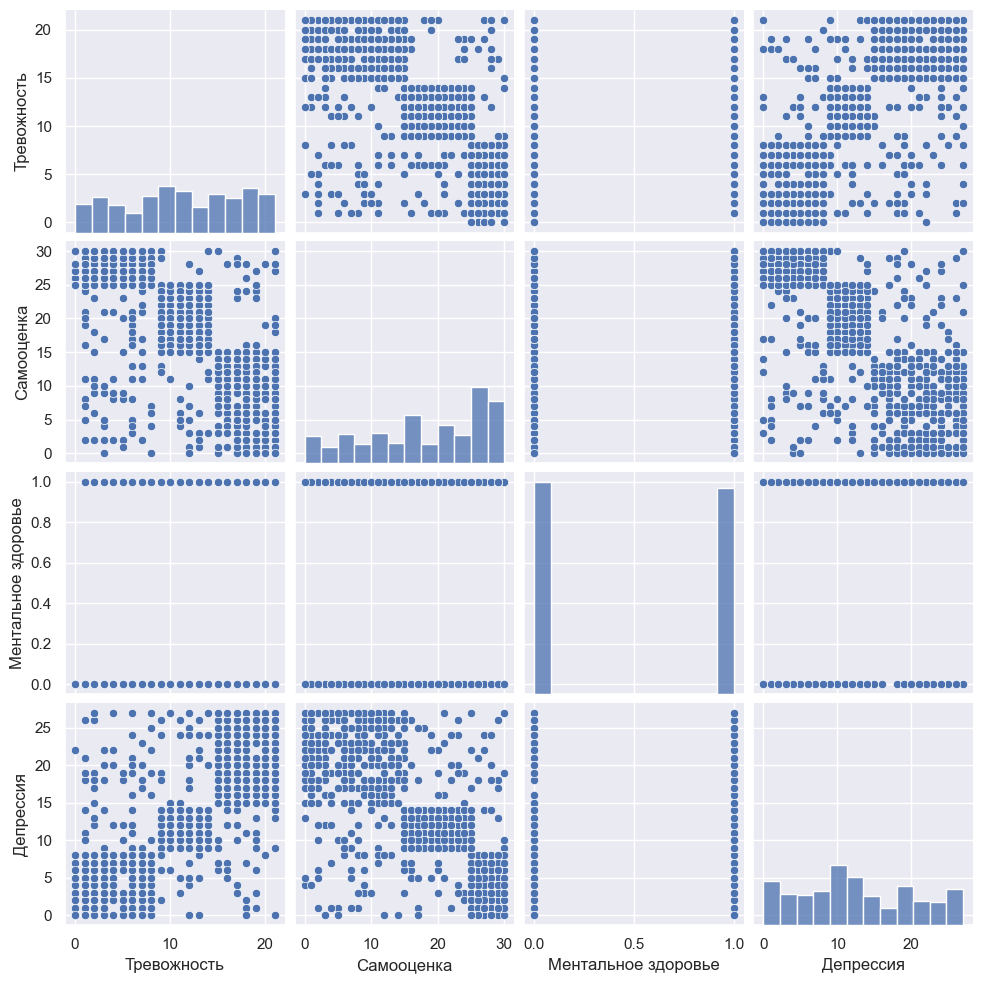

In [16]:
pair_plot = sns.pairplot(data=data.iloc[:, :4])
labels_pair = list(labels_all.values())[:4]
pair_plot.x_vars = labels_pair
pair_plot.y_vars = labels_pair
pair_plot._add_axis_labels()
plt.show()

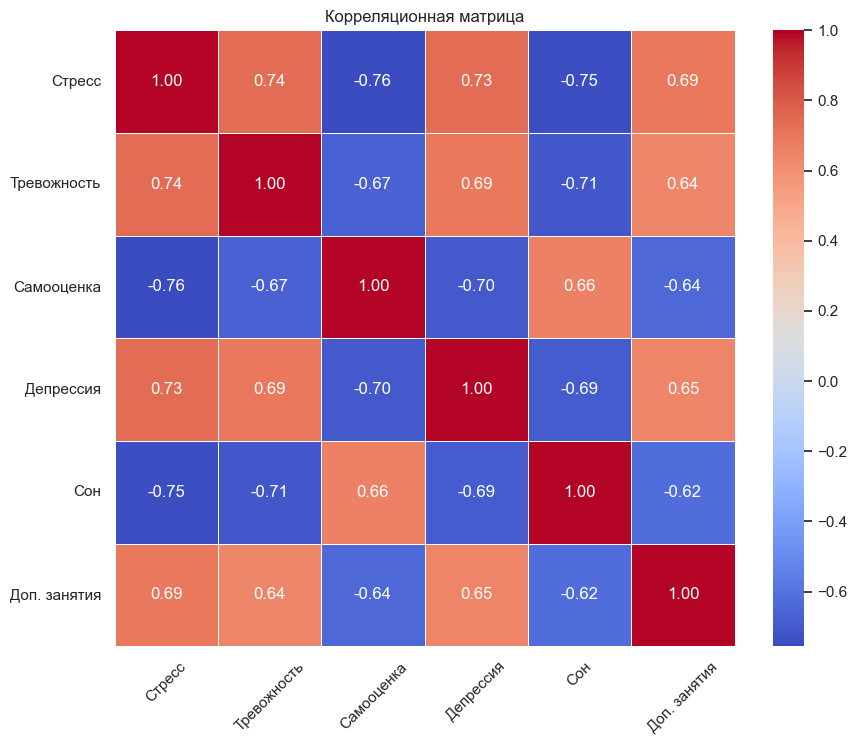

In [17]:
correlation_matrix = data[['stress_level', 'anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'extracurricular_activities']].corr()

labels = ['Стресс', 'Тревожность', 'Самооценка', 'Депрессия', 'Сон', 'Доп. занятия']

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(labels, rotation=45)
heatmap.set_yticklabels(labels, rotation=0)

plt.title('Корреляционная матрица')
plt.show()

In [18]:
data.corr(method='pearson')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.672745,0.634450,0.694340,0.632738,0.330867,-0.710292,0.561654,0.608624,-0.568434,...,-0.637079,-0.649601,0.586064,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
self_esteem,-0.672745,1.000000,-0.603502,-0.699602,-0.626058,-0.514692,0.662693,-0.510514,-0.571169,0.550535,...,0.631212,0.639045,-0.575112,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
mental_health_history,0.634450,-0.603502,1.000000,0.615882,0.604826,0.295617,-0.614146,0.464347,0.515290,-0.508525,...,-0.601196,-0.586193,0.532267,-0.587728,0.625909,-0.482560,0.580602,0.554576,0.624366,0.648644
depression,0.694340,-0.699602,0.615882,1.000000,0.657700,0.436084,-0.693161,0.522540,0.566250,-0.530351,...,-0.608776,-0.633174,0.602498,-0.673853,0.706561,-0.617972,0.635544,0.648551,0.665790,0.734379
headache,0.632738,-0.626058,0.604826,0.657700,1.000000,0.361986,-0.638771,0.461719,0.543557,-0.532825,...,-0.623199,-0.622059,0.542890,-0.625928,0.679307,-0.572988,0.622581,0.582562,0.609775,0.713484
blood_pressure,0.330867,-0.514692,0.295617,0.436084,0.361986,1.000000,-0.300323,0.162308,0.352744,-0.274686,...,-0.280590,-0.262785,0.348964,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
sleep_quality,-0.710292,0.662693,-0.614146,-0.693161,-0.638771,-0.300323,1.000000,-0.541687,-0.576645,0.535462,...,0.620955,0.671326,-0.551775,0.677569,-0.682130,0.554553,-0.649098,-0.623092,-0.699427,-0.749068
breathing_problem,0.561654,-0.510514,0.464347,0.522540,0.461719,0.162308,-0.541687,1.000000,0.459235,-0.448997,...,-0.508172,-0.507251,0.428791,-0.498895,0.545345,-0.365173,0.492729,0.516884,0.576341,0.573984
noise_level,0.608624,-0.571169,0.515290,0.566250,0.543557,0.352744,-0.576645,0.459235,1.000000,-0.452362,...,-0.572327,-0.513730,0.493625,-0.538758,0.575439,-0.492094,0.583817,0.563614,0.585458,0.663371
living_conditions,-0.568434,0.550535,-0.508525,-0.530351,-0.532825,-0.274686,0.535462,-0.448997,-0.452362,1.000000,...,0.503275,0.507221,-0.437732,0.549332,-0.565071,0.466594,-0.501795,-0.515794,-0.551139,-0.581723


In [19]:
data.corr(method='kendall')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.538938,0.532442,0.546061,0.540048,0.245451,-0.595289,0.451523,0.519534,-0.498590,...,-0.537376,-0.532732,0.506791,-0.543254,0.604444,-0.483971,0.528874,0.532282,0.598744,0.647481
self_esteem,-0.538938,1.000000,-0.518644,-0.558192,-0.552741,-0.327850,0.577854,-0.422308,-0.501008,0.491065,...,0.543432,0.552869,-0.497391,0.555502,-0.609198,0.566362,-0.494104,-0.525818,-0.551407,-0.672010
mental_health_history,0.532442,-0.518644,1.000000,0.519644,0.560623,0.319125,-0.555906,0.431771,0.489093,-0.487408,...,-0.544789,-0.530536,0.499598,-0.528477,0.566244,-0.461250,0.525036,0.504316,0.564518,0.611547
depression,0.546061,-0.558192,0.519644,1.000000,0.567866,0.282998,-0.588419,0.428263,0.488915,-0.472027,...,-0.514318,-0.531800,0.512091,-0.559828,0.594942,-0.517040,0.520884,0.532708,0.559521,0.649951
headache,0.540048,-0.552741,0.560623,0.567866,1.000000,0.259417,-0.596318,0.417031,0.512669,-0.520340,...,-0.569502,-0.566729,0.519210,-0.562651,0.627991,-0.540084,0.555051,0.531554,0.572798,0.682615
blood_pressure,0.245451,-0.327850,0.319125,0.282998,0.259417,1.000000,-0.268649,0.156859,0.275178,-0.249095,...,-0.254387,-0.245983,0.271467,-0.318662,0.296785,-0.650648,0.285594,0.316010,0.253986,0.319985
sleep_quality,-0.595289,0.577854,-0.555906,-0.588419,-0.596318,-0.268649,1.000000,-0.458992,-0.539769,0.514301,...,0.551196,0.593438,-0.525038,0.587517,-0.630000,0.534107,-0.589281,-0.568751,-0.641398,-0.710170
breathing_problem,0.451523,-0.422308,0.431771,0.428263,0.417031,0.156859,-0.458992,1.000000,0.410715,-0.425296,...,-0.441761,-0.436407,0.395723,-0.428335,0.475088,-0.351505,0.432053,0.441445,0.498883,0.510430
noise_level,0.519534,-0.501008,0.489093,0.488915,0.512669,0.275178,-0.539769,0.410715,1.000000,-0.447707,...,-0.527461,-0.482699,0.468364,-0.498921,0.533995,-0.471081,0.516334,0.506376,0.535359,0.632659
living_conditions,-0.498590,0.491065,-0.487408,-0.472027,-0.520340,-0.249095,0.514301,-0.425296,-0.447707,1.000000,...,0.476594,0.488492,-0.446013,0.519619,-0.535586,0.475531,-0.481175,-0.496878,-0.534661,-0.582628


In [20]:
data.corr(method='spearman')


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.697690,0.637310,0.710606,0.655032,0.390107,-0.723840,0.581754,0.642613,-0.617089,...,-0.651499,-0.658551,0.625706,-0.669814,0.732884,-0.584653,0.655899,0.659399,0.724711,0.741869
self_esteem,-0.697690,1.000000,-0.623528,-0.723546,-0.670725,-0.503764,0.702743,-0.550558,-0.620586,0.612669,...,0.677222,0.681204,-0.615613,0.689109,-0.734042,0.685273,-0.615428,-0.655805,-0.669219,-0.779133
mental_health_history,0.637310,-0.623528,1.000000,0.624378,0.624597,0.337306,-0.622293,0.481785,0.545818,-0.537228,...,-0.609994,-0.592700,0.557202,-0.590825,0.633593,-0.492520,0.586902,0.564395,0.631948,0.648632
depression,0.710606,-0.723546,0.624378,1.000000,0.690634,0.443593,-0.718818,0.553894,0.603029,-0.590446,...,-0.633907,-0.653382,0.639589,-0.695198,0.725636,-0.621784,0.642619,0.660812,0.682816,0.746773
headache,0.655032,-0.670725,0.624597,0.690634,1.000000,0.386560,-0.672116,0.503137,0.591624,-0.594546,...,-0.655200,-0.649632,0.593388,-0.653472,0.709174,-0.591184,0.639678,0.608009,0.640178,0.736590
blood_pressure,0.390107,-0.503764,0.337306,0.443593,0.386560,1.000000,-0.398781,0.212549,0.385659,-0.341851,...,-0.366539,-0.353812,0.378965,-0.442138,0.440929,-0.789581,0.402668,0.443431,0.388288,0.444069
sleep_quality,-0.723840,0.702743,-0.622293,-0.718818,-0.672116,-0.398781,1.000000,-0.560003,-0.624393,0.592440,...,0.631750,0.675306,-0.603662,0.680664,-0.708875,0.586895,-0.677760,-0.652660,-0.723083,-0.760959
breathing_problem,0.581754,-0.550558,0.481785,0.553894,0.503137,0.212549,-0.560003,1.000000,0.493258,-0.504910,...,-0.532509,-0.524890,0.470971,-0.519750,0.577079,-0.398493,0.516463,0.537051,0.600442,0.589575
noise_level,0.642613,-0.620586,0.545818,0.603029,0.591624,0.385659,-0.624393,0.493258,1.000000,-0.520596,...,-0.618764,-0.559439,0.547579,-0.583693,0.613224,-0.526438,0.602385,0.589878,0.621468,0.695952
living_conditions,-0.617089,0.612669,-0.537228,-0.590446,-0.594546,-0.341851,0.592440,-0.504910,-0.520596,1.000000,...,0.556527,0.562530,-0.509984,0.601323,-0.620337,0.517218,-0.558788,-0.577570,-0.609681,-0.637287


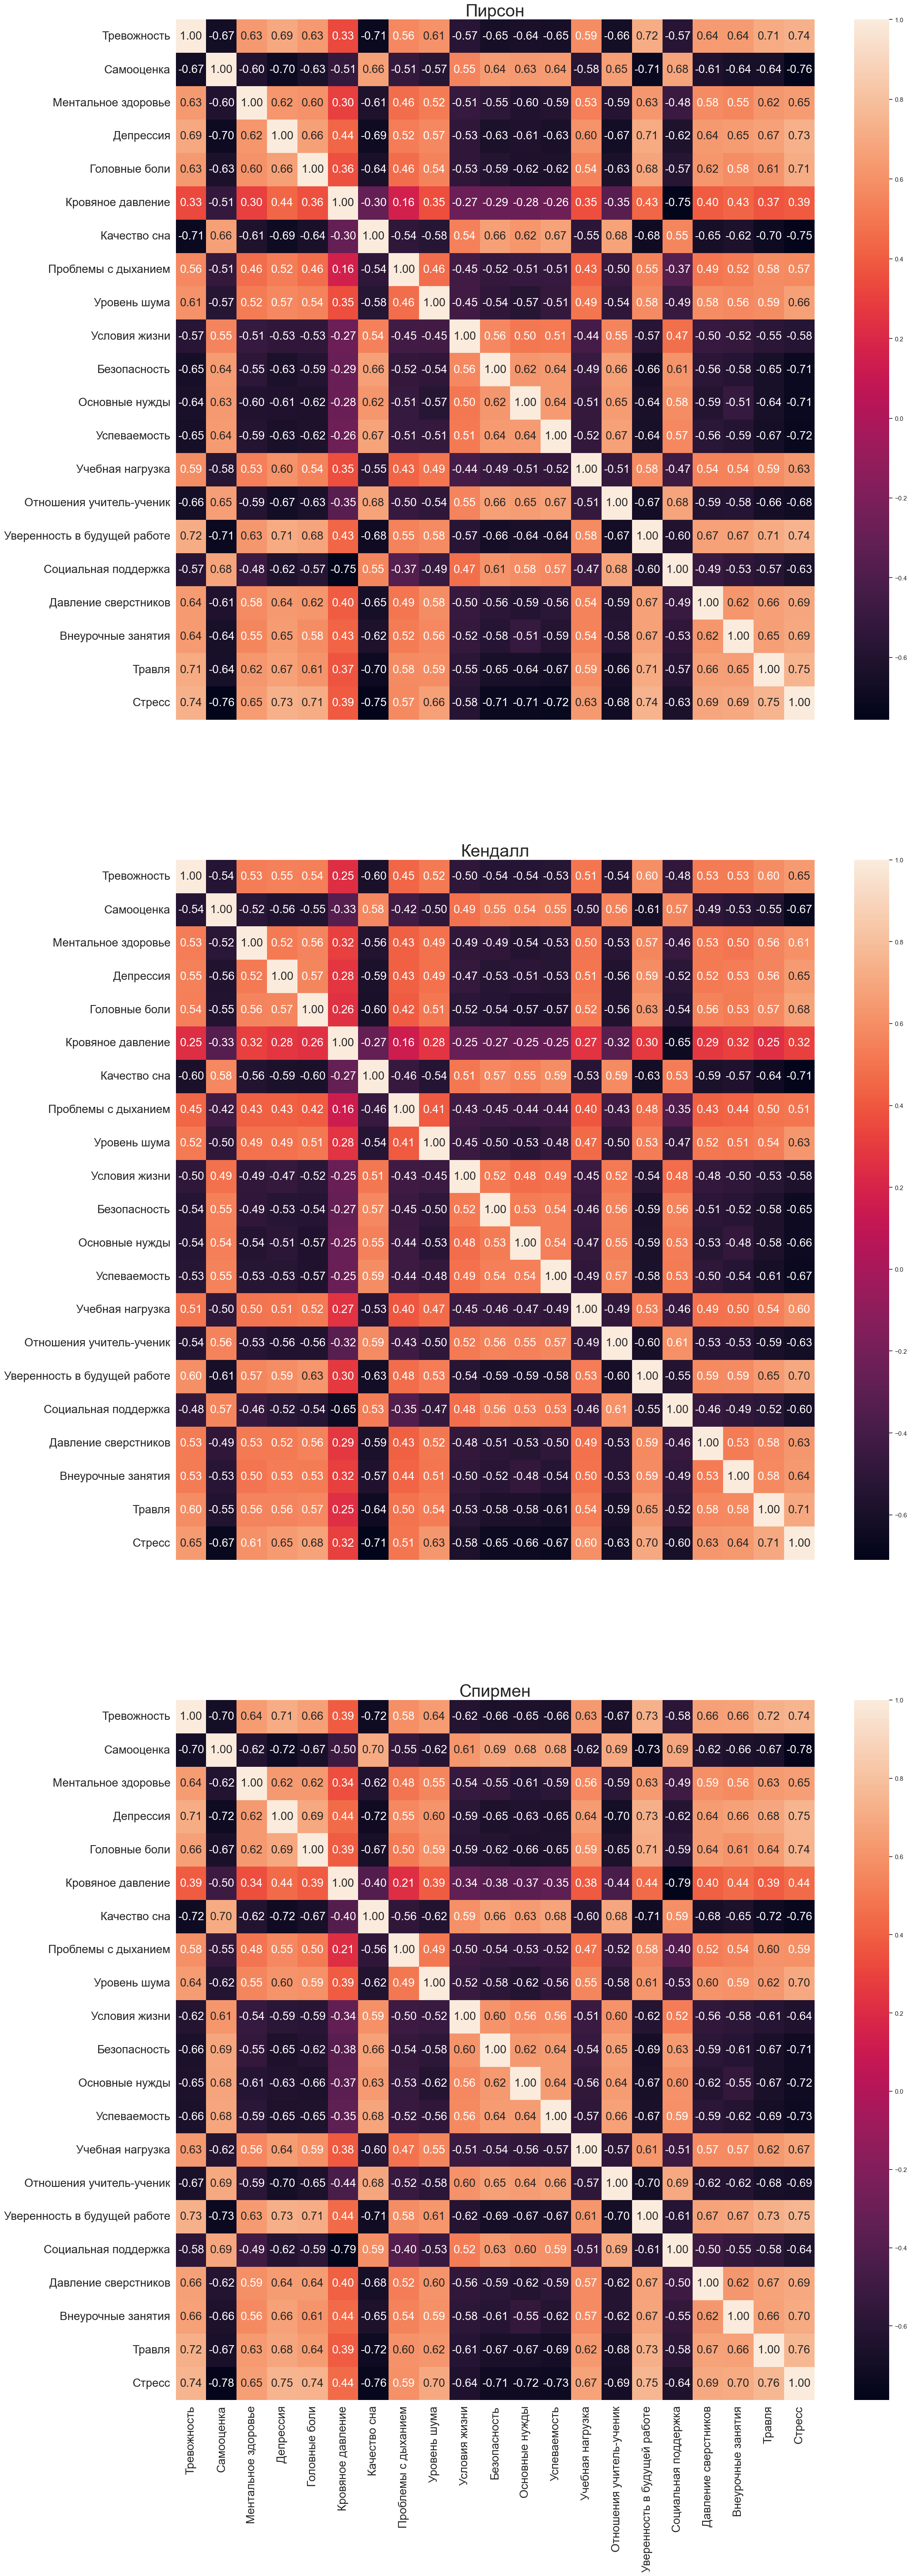

In [21]:
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(25, 75))
font_size = 20

sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f', annot_kws={"size": font_size})
ax[0].set_title('Пирсон', fontsize=font_size+10)
ax[0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0].set_xticklabels([labels_all[label.get_text()] for label in ax[0].get_xticklabels()])
ax[0].set_yticklabels([labels_all[label.get_text()] for label in ax[0].get_yticklabels()])

sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f', annot_kws={"size": font_size})
ax[1].set_title('Кендалл', fontsize=font_size+10)
ax[1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1].set_xticklabels([labels_all[label.get_text()] for label in ax[1].get_xticklabels()])
ax[1].set_yticklabels([labels_all[label.get_text()] for label in ax[1].get_yticklabels()])

sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f', annot_kws={"size": font_size})
ax[2].set_title('Спирмен', fontsize=font_size+10)
ax[2].tick_params(axis='both', which='major', labelsize=font_size)
ax[2].set_xticklabels([labels_all[label.get_text()] for label in ax[2].get_xticklabels()])
ax[2].set_yticklabels([labels_all[label.get_text()] for label in ax[2].get_yticklabels()])

plt.show()